In [9]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Function to convert galactic coordinates to Cartesian coordinates
def galactic_to_cartesian(l, b, r):
    l, b = np.radians(l), np.radians(b)
    x = r * np.cos(b) * np.cos(l)
    y = r * np.cos(b) * np.sin(l)
    z = r * np.sin(b)
    return x, y, z


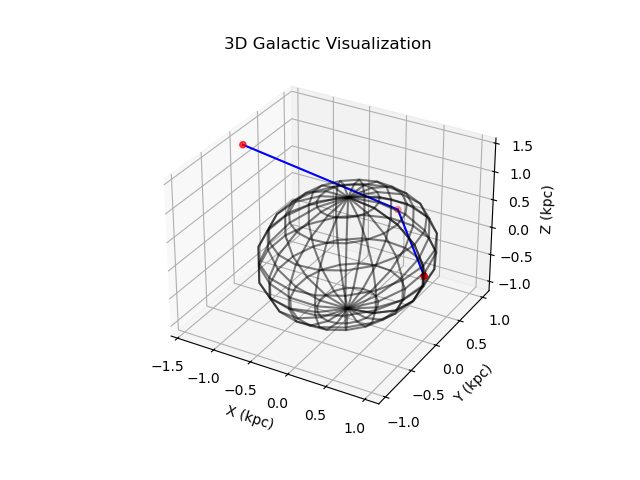

In [3]:

# Example galactic coordinates (longitude, latitude, radius)
coordinates = [
    (0, 0, 1),   # Center of the galaxy
    (90, 0, 1),  # 90 degrees longitude
    (180, 45, 2) # Some point in space
]

# Convert to Cartesian coordinates for plotting
points = np.array([galactic_to_cartesian(*coord) for coord in coordinates])

# Plot points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], color='r')

# Draw lines between points
for i in range(len(points)-1):
    ax.plot([points[i][0], points[i+1][0]], [points[i][1], points[i+1][1]], [points[i][2], points[i+1][2]], color='blue')

# Add spherical shell at radius 1
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="k", alpha=0.5)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('3D Galactic Visualization')

plt.show()


ValueError: THETA is out of range [0,pi]

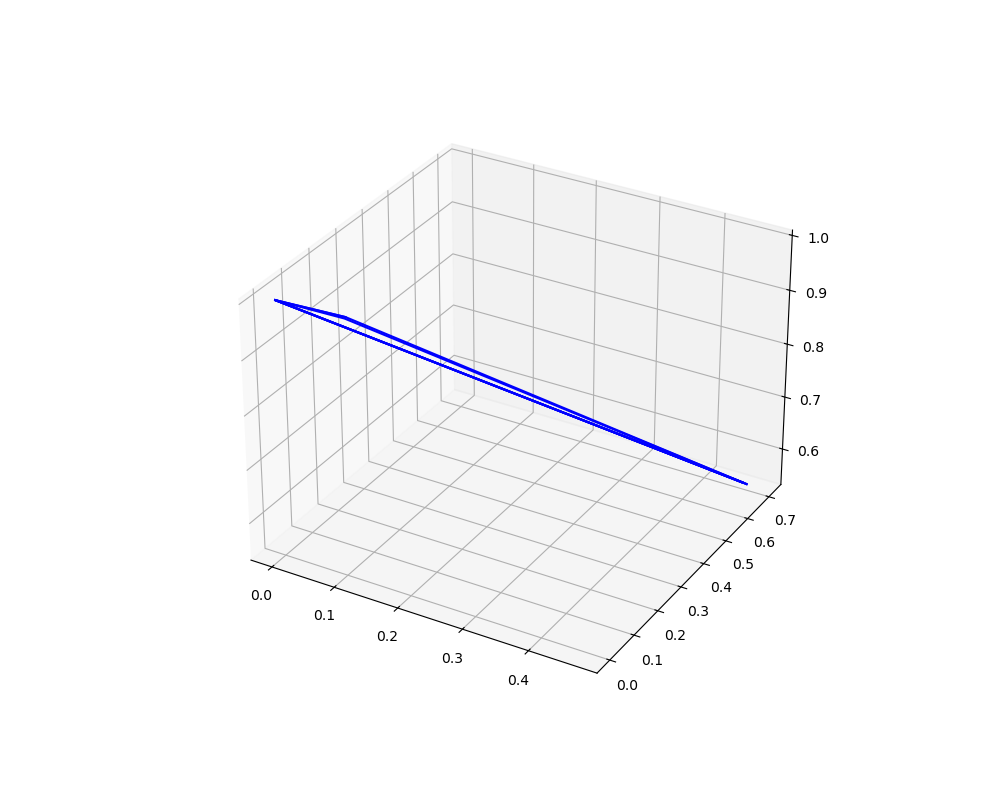

In [12]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_healpix_borders(nside):
    # Set up the figure and 3D axis
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Get the number of pixels
    npix = hp.nside2npix(nside)
    
    # Loop through each pixel to get its vertices
    for ipix in range(npix):
        # Get the theta and phi of the corners of the pixel
        vertices = hp.boundaries(nside, ipix, step=1)
        theta, phi = vertices[:, 0], vertices[:, 1]
        
        # Convert to Cartesian coordinates for 3D plotting
        x, y, z = hp.ang2vec(theta, phi).T
        
        # Plot each edge of the pixel
        ax.plot(x, y, z, color='b')

    # Set the aspect of the plot to be equal
    ax.set_box_aspect([1,1,1])
    
    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D View of HEALPix Borders')

    # Show the plot
    plt.show()

# Example usage
nside = 8  # You can change the nside to increase/decrease the resolution
plot_healpix_borders(nside)


In [10]:
u

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.33069396, 0.33069396, 0.33069396, 0.33069396, 0.33069396,
        0.33069396, 0.33069396, 0.33069396, 0.33069396, 0.33069396],
       [0.66138793, 0.66138793, 0.66138793, 0.66138793, 0.66138793,
        0.66138793, 0.66138793, 0.66138793, 0.66138793, 0.66138793],
       [0.99208189, 0.99208189, 0.99208189, 0.99208189, 0.99208189,
        0.99208189, 0.99208189, 0.99208189, 0.99208189, 0.99208189],
       [1.32277585, 1.32277585, 1.32277585, 1.32277585, 1.32277585,
        1.32277585, 1.32277585, 1.32277585, 1.32277585, 1.32277585],
       [1.65346982, 1.65346982, 1.65346982, 1.65346982, 1.65346982,
        1.65346982, 1.65346982, 1.65346982, 1.65346982, 1.65346982],
       [1.98416378, 1.98416378, 1.98416378, 1.98416378, 1.98416378,
        1.98416378, 1.98416378, 1.98416378, 1.98416378, 1.98416378],
       [2.31485774, 2.31485774, 2.3148577

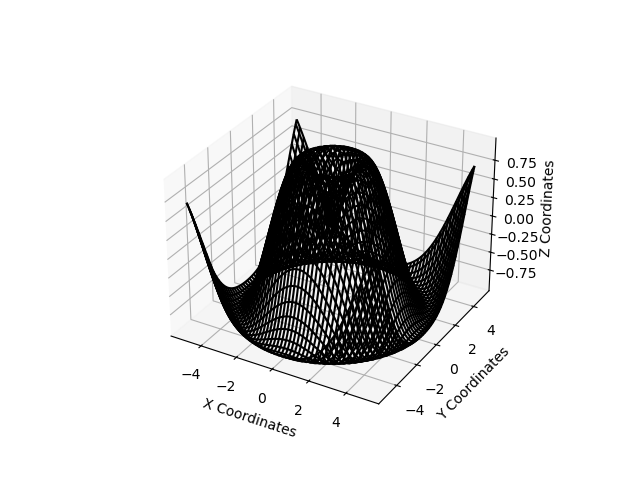

In [4]:

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Example data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Plot a wireframe
ax.plot_wireframe(X, Y, Z, color='k')

ax.set_xlabel('X Coordinates')
ax.set_ylabel('Y Coordinates')
ax.set_zlabel('Z Coordinates')

plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to convert galactic coordinates to Cartesian coordinates
def galactic_to_cartesian(l, b, r):
    l, b = np.radians(l), np.radians(b)
    x = r * np.cos(b) * np.cos(l)
    y = r * np.cos(b) * np.sin(l)
    z = r * np.sin(b)
    return x, y, z

# Example galactic coordinates (longitude, latitude, radius)
coordinates = [
    (star_l, star_b, star_r),   # Star
    (isrf_point_l, isrf_point_b, isrf_point_r) # Point where we are calculating the isrf
]

# Convert to Cartesian coordinates for plotting
points = np.array([galactic_to_cartesian(*coord) for coord in coordinates])

# Plot points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], color='r')

# Draw lines between points
for i in range(len(points)-1):
    ax.plot([points[i][0], points[i+1][0]], [points[i][1], points[i+1][1]], [points[i][2], points[i+1][2]], color='blue')

# Add spherical shell at radius 1
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = d*np.cos(u)*np.sin(v)
y = d*np.sin(u)*np.sin(v)
z =d* np.cos(v)
ax.plot_wireframe(x, y, z, color="k", alpha=0.5)

ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('3D Galactic Visualization')

plt.show()


NameError: name 'star_l' is not defined

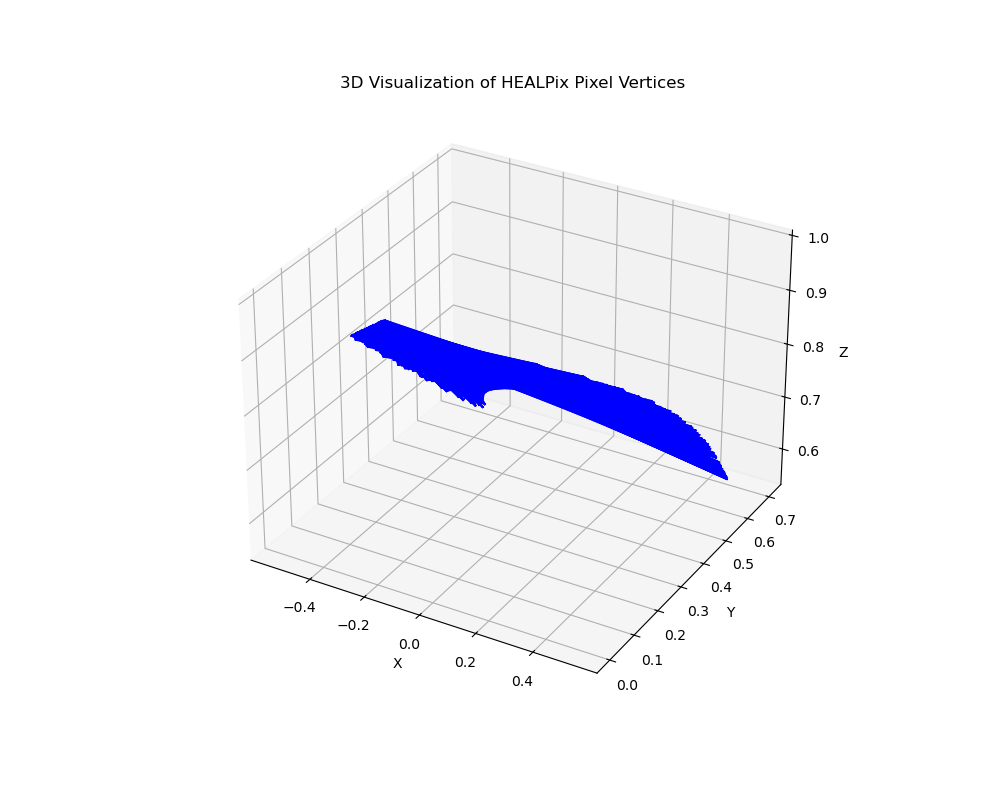

In [6]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set the HEALPix resolution
nside = 8  # A manageable nside value for clear visualization

# Prepare a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Iterate over all pixels to plot their boundaries
for pix in range(hp.nside2npix(nside)):
    # Get the boundaries of the pixel (returns vertices in theta, phi)
    # We are now extracting the full shape which is (3, N)
    vertices = hp.boundaries(nside, pix, step=1, nest=False)  # Using RING ordering by default
    theta, phi = vertices[:,0], vertices[:,1]

    # Convert spherical coordinates to Cartesian coordinates for 3D plotting
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    # Connect the vertices to form the edges of the pixel
    # Append the first vertex to the end to close the polygon
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    z = np.append(z, z[0])

    ax.plot(x, y, z, 'blue')  # Color blue

# Enhance the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Visualization of HEALPix Pixel Vertices')
ax.grid(True)

plt.show()



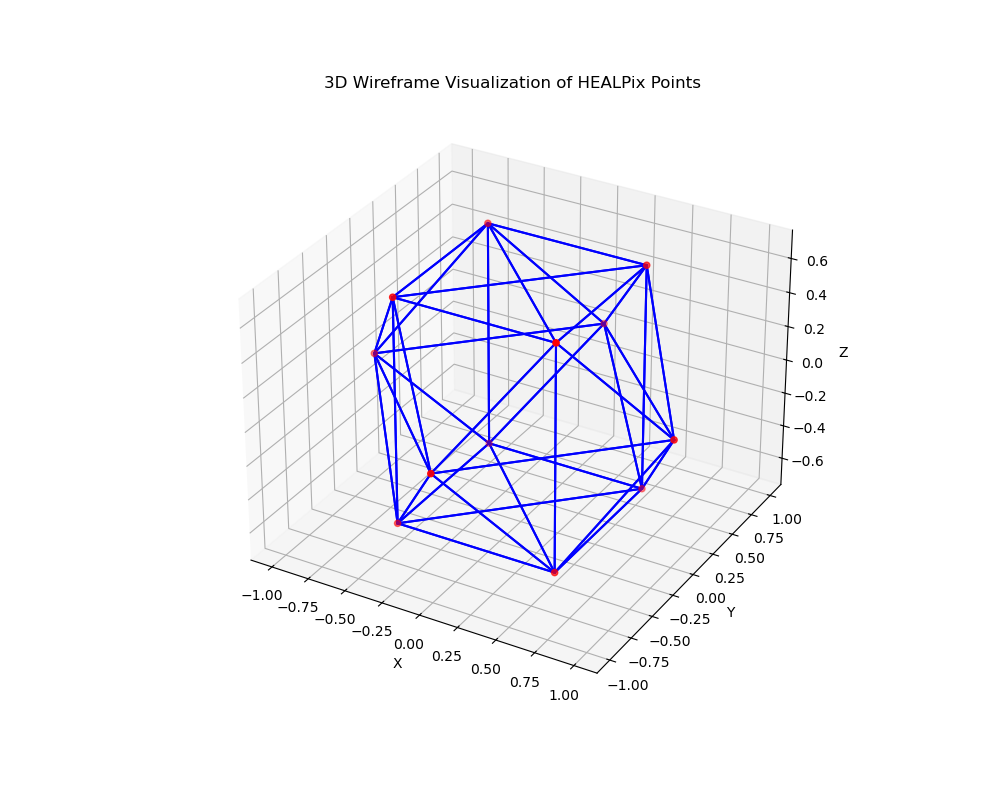

In [7]:

# Set the HEALPix resolution
nside = 1  # Lower nside for clarity in visual connections
npix = hp.nside2npix(nside)

# Get the coordinates of the HEALPix pixels
theta, phi = hp.pix2ang(nside, np.arange(npix))

# Convert spherical coordinates to Cartesian coordinates for 3D plotting
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Prepare a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each pixel's neighbors
for pix in range(npix):

    neighbors = hp.get_all_neighbours(nside, pix)
    x_cent, y_cent, z_cent = x[pix], y[pix], z[pix]
    
    for neigh in neighbors:
        if neigh < 0:  # Skip non-existing neighbors (might happen at the borders)
            continue
        # Connect current point to its neighbor
        ax.plot([x_cent, x[neigh]], [y_cent, y[neigh]], [z_cent, z[neigh]], 'blue')  # Color blue

# Scatter plot for point visualization (optional, for clarity)
ax.scatter(x, y, z, color='red', s=20)  # Color red, larger point size for visibility

# Enhance the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Wireframe Visualization of HEALPix Points')
ax.grid(True)

plt.show()